In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [125]:
df = pd.read_csv("Breast_Cancer_Wisconsin.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [126]:
df.shape

(569, 32)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [128]:
df["diagnosis"] = df["diagnosis"].replace({"M": 1, "B": 0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


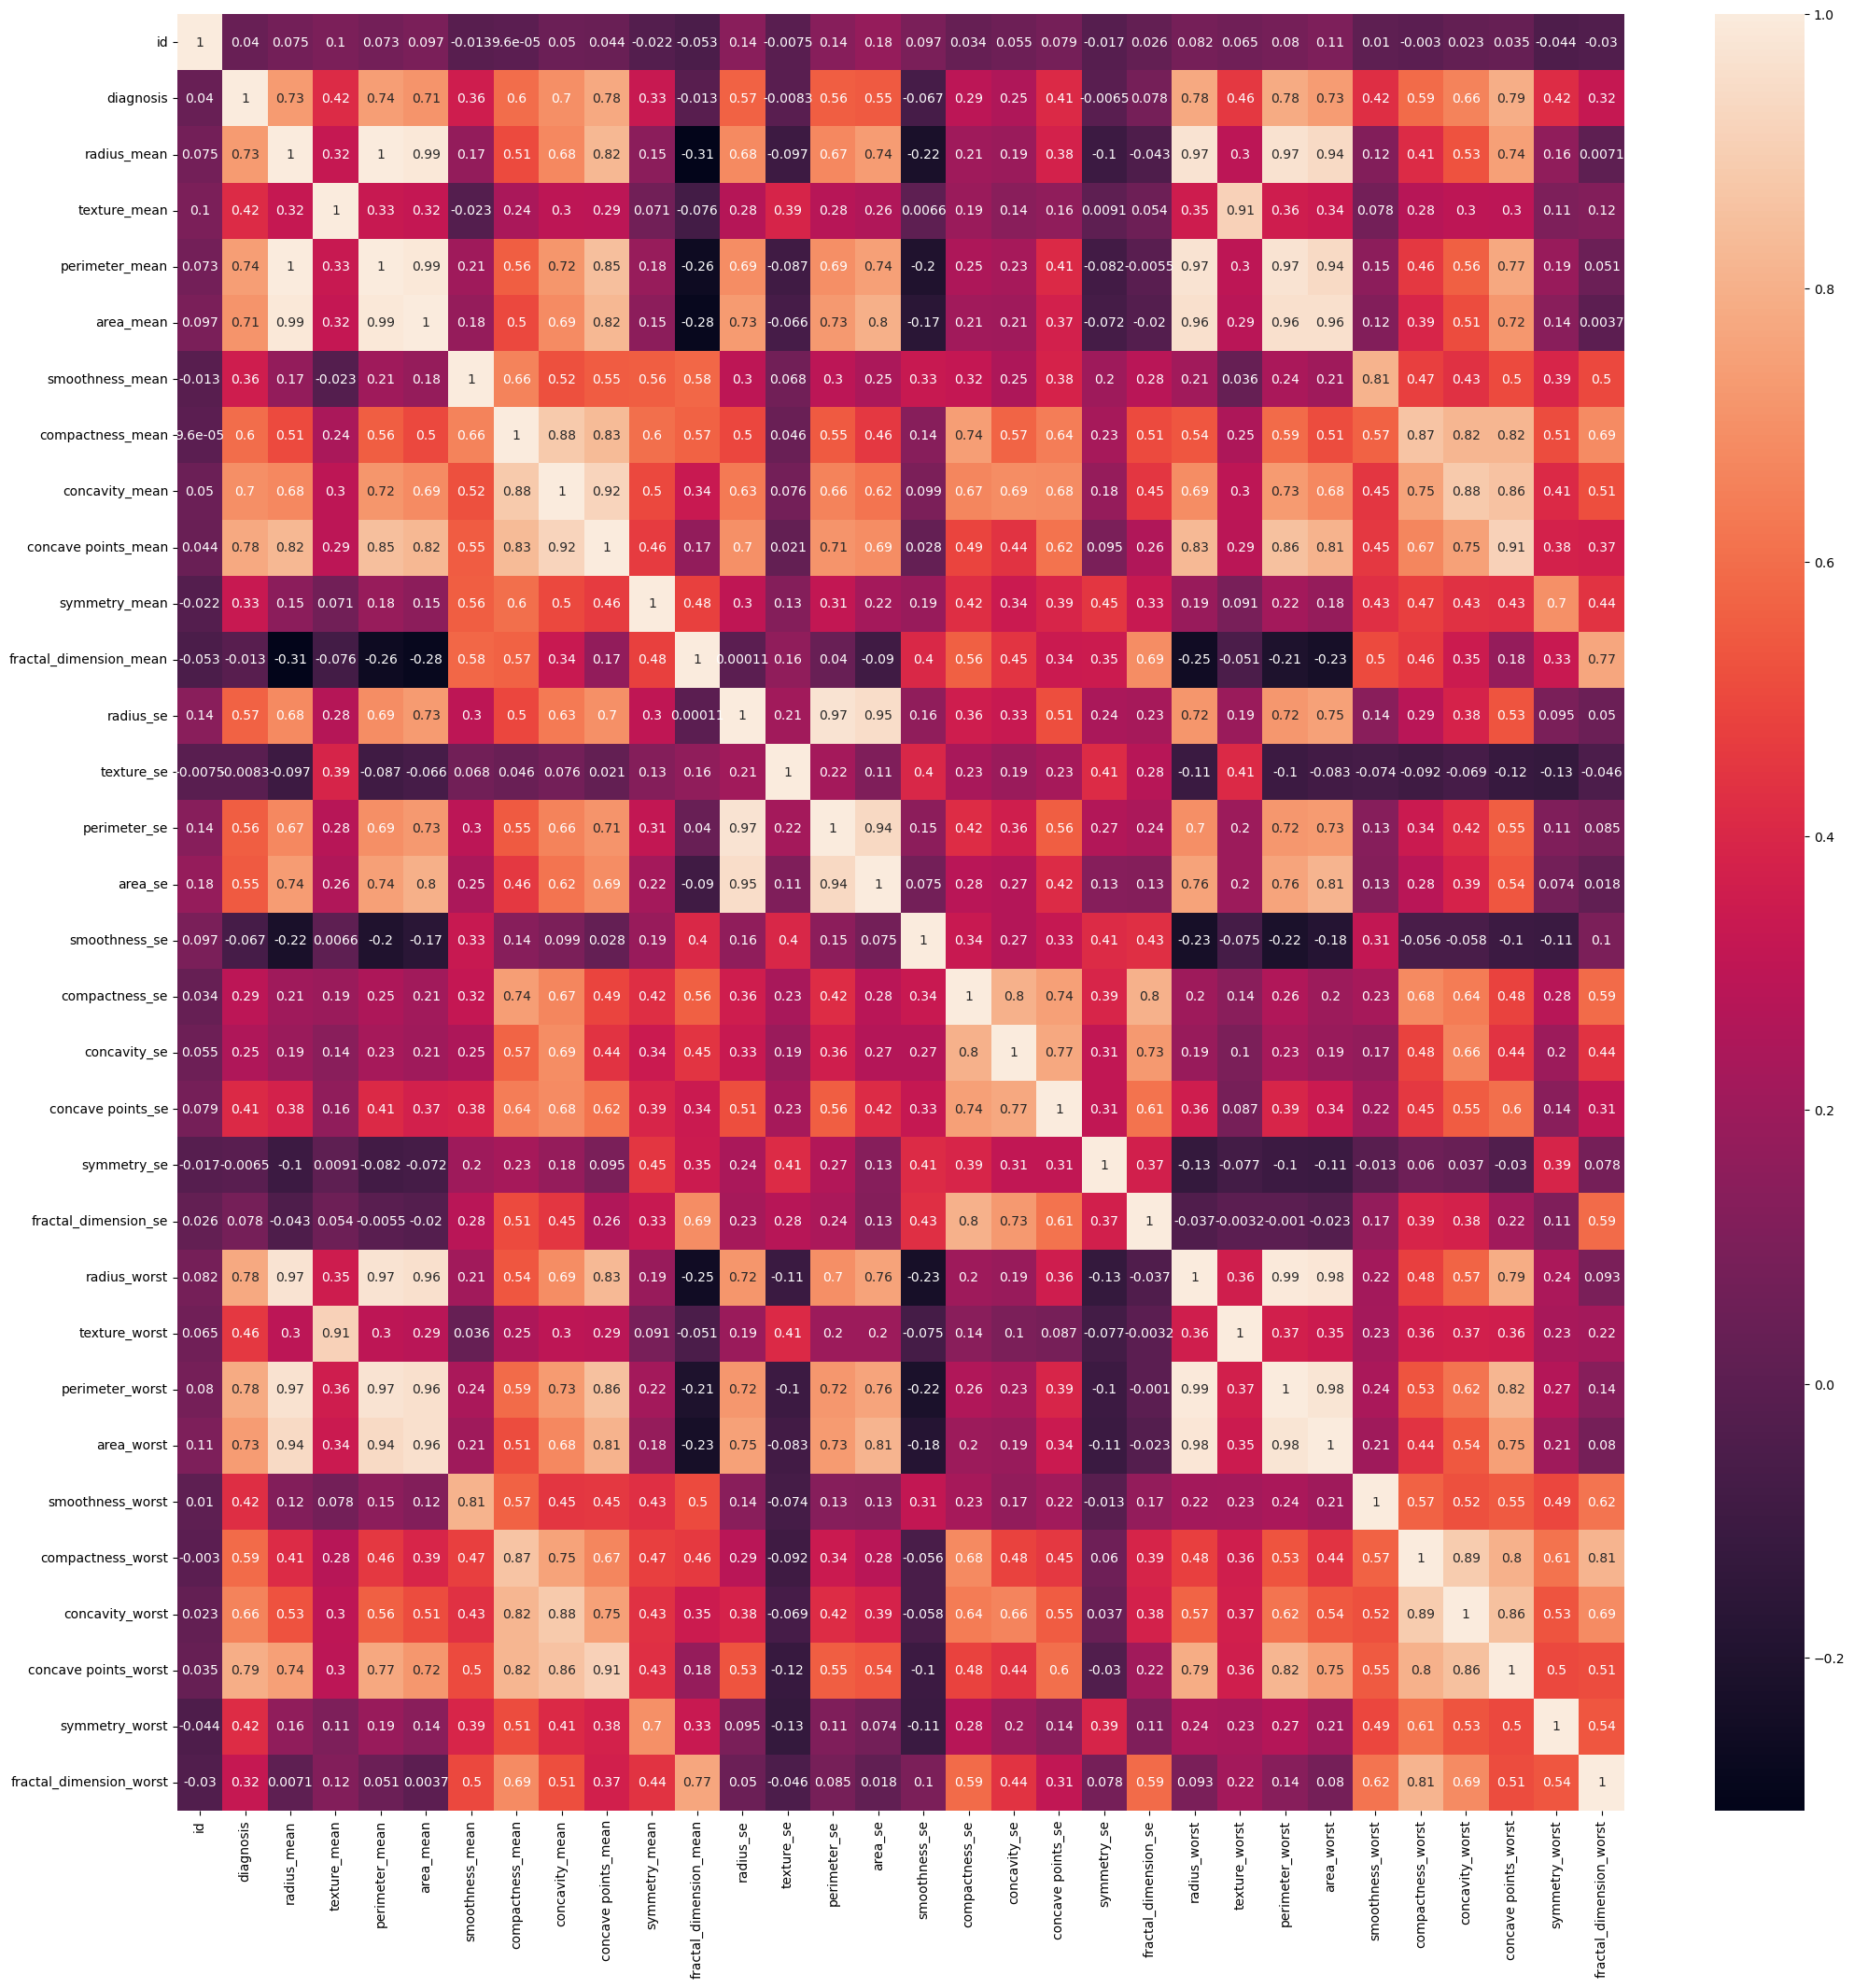

In [129]:
correlations = df.corr()
plt.figure(figsize=(25,25))
g=sns.heatmap(correlations,annot=True)

In [130]:
#correlations.reindex(correlations["concave points_worst"].abs().sort_values().index)["concave points_worst"] # ordered by absolute value
#correlations.reindex(correlations["diagnosis"].abs().sort_values().index)["diagnosis"] # ordered by absolute value

In [131]:
X = df.iloc[:, [23, 29]].values # features : concave points_worst texture_worst
Y = df.iloc[:,1].values # labels : diagnosis

In [132]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=2/3)

In [133]:
k_avg_score1 = np.zeros(21)
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, X1_train, Y1_train, cv=10)
    k_avg_score1[k] = cv_scores.mean()

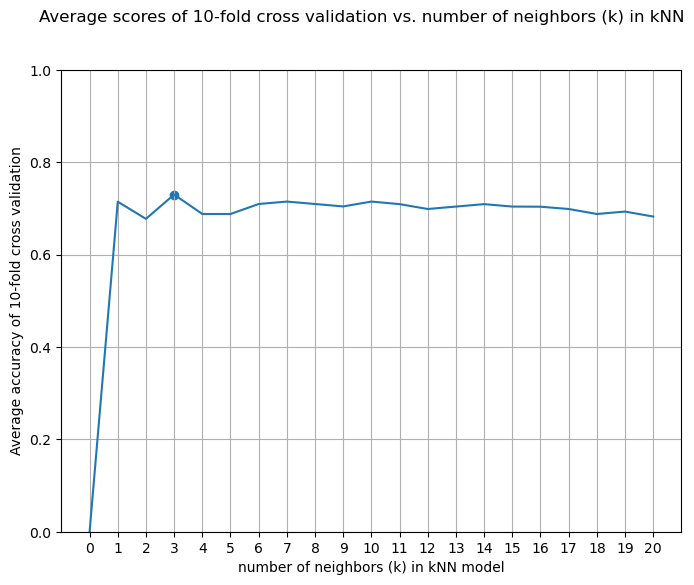

In [134]:
fig, ax = plt.subplots()
ax.plot(k_avg_score1)
ax.set_xticks(np.arange(0, 21));
ax.set_ylim(0, 1)
ax.scatter(np.argmax(k_avg_score1), np.max(k_avg_score1)) # argmax returns the index of the maximum value
fig.set_size_inches(8, 6)
fig.suptitle('Average scores of 10-fold cross validation vs. number of neighbors (k) in kNN')
ax.set_xlabel('number of neighbors (k) in kNN model')
ax.set_ylabel('Average accuracy of 10-fold cross validation')
plt.grid()

In [135]:
knn = KNeighborsClassifier(n_neighbors=np.argmax(k_avg_score1))#refait un entrainement de toute la donnée avec le meilleur K 
knn.fit(X1_train, Y1_train)

#test the model 
test_score = knn.score(X1_test, Y1_test)
print(f"Test accuracy score is: {round(test_score,3)}")

Test accuracy score is: 0.705


Question 2)
 - We observed a favorable modification of the result. The StandardScaler influence the result to be more good because the KNN algorithm is based on the distance and the big values could lead us to a wrong determination of which one is the nearest neighbour. 

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Adaptation (fit) du scaler aux données d'entraînement
scaler.fit(X1_train)

# Transformation des données d'entraînement et de test
X_train_scaled = scaler.transform(X1_train)
X_test_scaled = scaler.transform(X1_test)

In [137]:
k_avg_score2 = np.zeros(21)
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, X_train_scaled, Y1_train, cv=10)
    k_avg_score2[k] = cv_scores.mean()

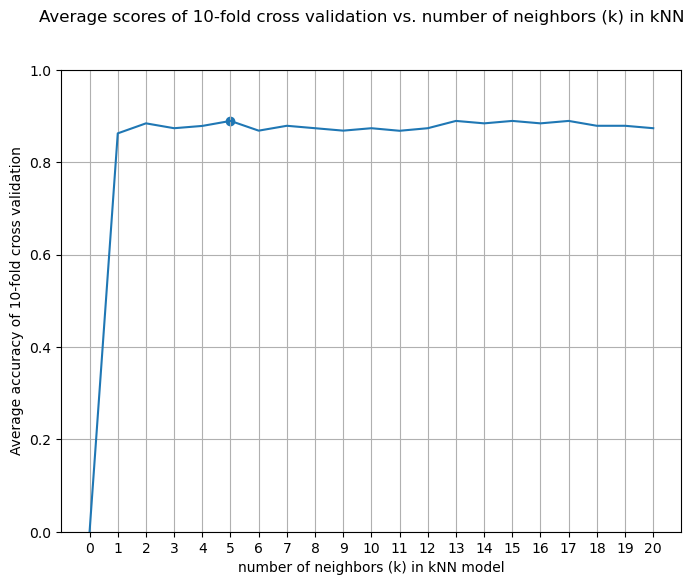

In [138]:
fig, ax = plt.subplots()
ax.plot(k_avg_score2)
ax.set_xticks(np.arange(0, 21));
ax.set_ylim(0, 1)
ax.scatter(np.argmax(k_avg_score2), np.max(k_avg_score2)) # argmax returns the index of the maximum value
fig.set_size_inches(8, 6)
fig.suptitle('Average scores of 10-fold cross validation vs. number of neighbors (k) in kNN')
ax.set_xlabel('number of neighbors (k) in kNN model')
ax.set_ylabel('Average accuracy of 10-fold cross validation')
plt.grid()

In [140]:
knn = KNeighborsClassifier(n_neighbors=np.argmax(k_avg_score2))#refait un entrainement de toute la donnée avec le meilleur K 
knn.fit(X_train_scaled, Y1_train)

#test the model 
test_score = knn.score(X_test_scaled, Y1_test)
print(f"Test accuracy score is: {round(test_score,3)}")

Test accuracy score is: 0.911


Question 3)

In [145]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X, Y, test_size=0.8)
scaler.fit(X3_train)
# Transformation des données d'entraînement et de test
X3_train_scaled = scaler.transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

In [146]:
k_avg_score3 = np.zeros(21)
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, X3_train_scaled, Y3_train, cv=10)
    k_avg_score3[k] = cv_scores.mean()

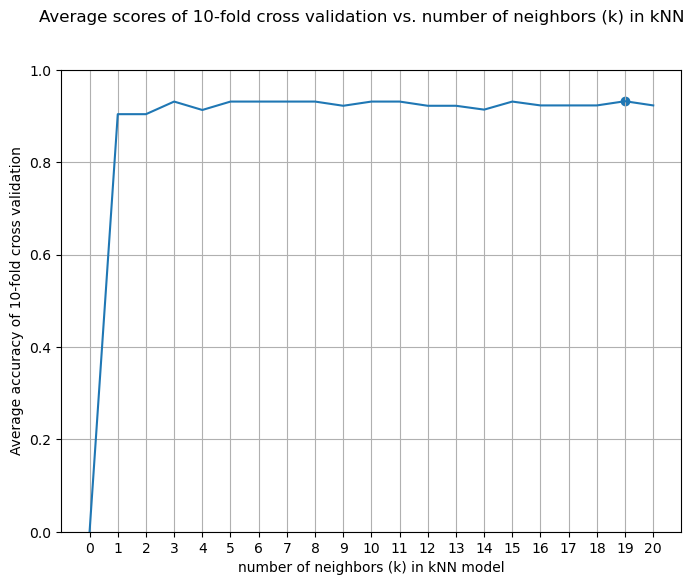

In [147]:
fig, ax = plt.subplots()
ax.plot(k_avg_score3)
ax.set_xticks(np.arange(0, 21));
ax.set_ylim(0, 1)
ax.scatter(np.argmax(k_avg_score3), np.max(k_avg_score3)) # argmax returns the index of the maximum value
fig.set_size_inches(8, 6)
fig.suptitle('Average scores of 10-fold cross validation vs. number of neighbors (k) in kNN')
ax.set_xlabel('number of neighbors (k) in kNN model')
ax.set_ylabel('Average accuracy of 10-fold cross validation')
plt.grid()

In [148]:
knn = KNeighborsClassifier(n_neighbors=np.argmax(k_avg_score3))#refait un entrainement de toute la donnée avec le meilleur K 
knn.fit(X3_train_scaled, Y3_train)

#test the model 
# test the model on the test set
test_score = knn.score(X3_test_scaled, Y3_test)
print(f"Test accuracy score is: {round(test_score,3)}")

Test accuracy score is: 0.901


a) This is the confusion matrix

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [161]:
# an array of prediction only with 0 if not correct and 1 if correct
y_pred = knn.predict(X3_test_scaled)

In [162]:
#create a confusion matrix
cmtx = pd.DataFrame(
    confusion_matrix(Y3_test, y_pred, labels=[0, 1]), 
    index=['real: 0', 'real: 1'], columns=['pred: 0', 'pred: 1']
)
cmtx

,pred: 0,pred: 1
real: 0,272,23
real: 1,22,139


b) There are :
 - The accuracy 
 - The Precision 
 - Recall
 - F1_score

In [164]:
print("The accuracy is", accuracy_score(Y3_test, y_pred))

The accuracy is 0.9013157894736842


In [165]:
print("The precision is", precision_score(Y3_test, y_pred))

The precision is 0.8580246913580247


In [167]:
print("The recall is", recall_score(Y3_test, y_pred))

The recall is 0.8633540372670807


In [169]:
print("The F1_score is", f1_score(Y3_test, y_pred))

The F1_score is 0.8606811145510836


c) The errors of our classifier is that sometime it predict that a cancer is malignant even if it's begnin and vice versa. 
It directly influence on the accurency because if we make predictions errors it will lead to a reduction of the accuracy score. 
It also influence in the same way on the three others measures, it means that more errors we do more those measures are going to be less elevated (more close to 0). 